<a href="https://www.kaggle.com/layusmen/superstore-sales-analysis-and-forecasting?scriptVersionId=88967301" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Superstore Sales Analysis and Forecasting** #
This analysis makes use of a data on Kaggle and performs **two important functions**:
1.	Exploratory Data Analysis with Python.
2.	Forecasting Using Facebook Prophet.

Throughout the analysis, the following **Libraries were used**:
1.	Pandas.
2.	Numpy.
3.	Plotly. 
4.	[Cufflinks](https://github.com/santosjorge/cufflinks).
5.	Seaborn.
6.	Matplotlib.
7.	Pystan
8.	[Facebook Prophet](https://facebook.github.io/prophet/).


### **Business Point of Few**
A superstore with operations across the City of US aims to understand some certain features of his business and get vital information from its data to be able to plan or focus on what is selling with a full understanding of sales trend and forecasting for the future all things being equal.

This kind of analysis will reduce understocking and overstocking, also focus extremely on the selling products by taking into consideration, the demand and supply.

### **Problem Statement** ###

Every store be it online or offline needs evaluation and analysis to predict daily sales and know what goods customers want at a particular time and what the trend would be every day, month and year.

The major focus of this analysis is to understand the following:

Sales Trend.
Most Selling Products by Number of Sales.
Least Selling Product by Number of Sales.
Most preferred Shipping Mode by Sales.
Profitable Categories.
Numbers of Product Sold by Category.
Cities With Highest Sales
Top Selling Products by Amount of Sales.

Forecasting for Future Purposes.


### **Desired Outcome**
The outcome of the analysis is to give the store management a comprehensive, but easy to understand analysis using some key visualization tools for easy understand and also forcast future sales


### **Data Info** ###
The Columns are:

Row ID, Order ID, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country City, State Postal Code, Region, Product ID, Category, Sub-Category, Product Name, and Sales.


## **Superstore Exploratory Data Analysis**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


### **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks as cf
### Clear Warning
import warnings; 
warnings.simplefilter('ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



5.5.0


## **Importing the Data**

In [3]:
# Reading the data as a time series,
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')



In [4]:
sales = sales = pd.read_csv('../input/sales-forecasting/train.csv', parse_dates=['Order Date'], date_parser=dateparse)
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### **Check the Shape**

In [5]:
sales.shape

(9800, 18)

### **Plot the Whole Data**

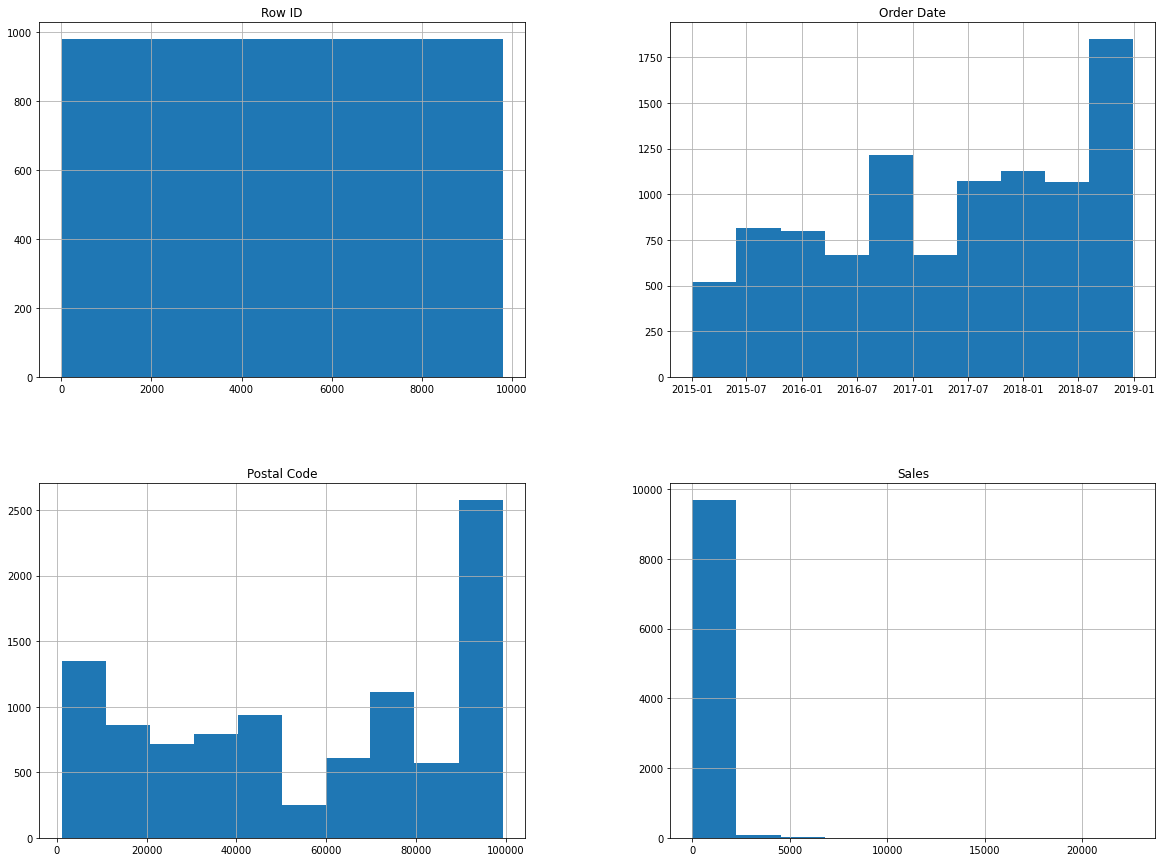

In [6]:
sales.hist(figsize = (20,15))
plt.show()

### **Describe the Dataset**

In [7]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


### **Check the Rows with Null Values**

Checking, there **11 missing values** in the **Postal Code Column**, and this value, since they are not much, could be dropped using **dropna**.

1.	 First process: **sales.isnull().sum()**
2.	 Second process: **sales.dropna(inplace = True)**

In [8]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
sales.dropna(inplace = True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

## **Total Sales Trend**
To check the total sales trend, we do some analysis, then we plot the trend graph using **three different libraries**.

In [10]:
# To read the data as a time series, we have to pass special arguments to the read_csv command:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

### **Convert Order Date to Datetime**  ###

In [11]:
#Convert Order Date to Datetime
sales['Order Date']= pd.to_datetime(sales['Order Date'])
#Create a Month Year Column
sales['Year Month'] = sales['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [12]:
sales_trend = pd.DataFrame(sales.groupby('Year Month').sum()['Sales'].reset_index())
sales_trend

,Year Month,Sales
0,2015-01,14205.7070
1,2015-02,4519.8920
2,2015-03,55205.7970
3,2015-04,27906.8550
4,2015-05,23644.3030
5,2015-06,34322.9356
6,2015-07,33781.5430
7,2015-08,27117.5365
8,2015-09,81623.5268
9,2015-10,31453.3930


### **Plotting the graph** ###

Two ways to plot the graph: 
* use matplotlib.
* use plotly.

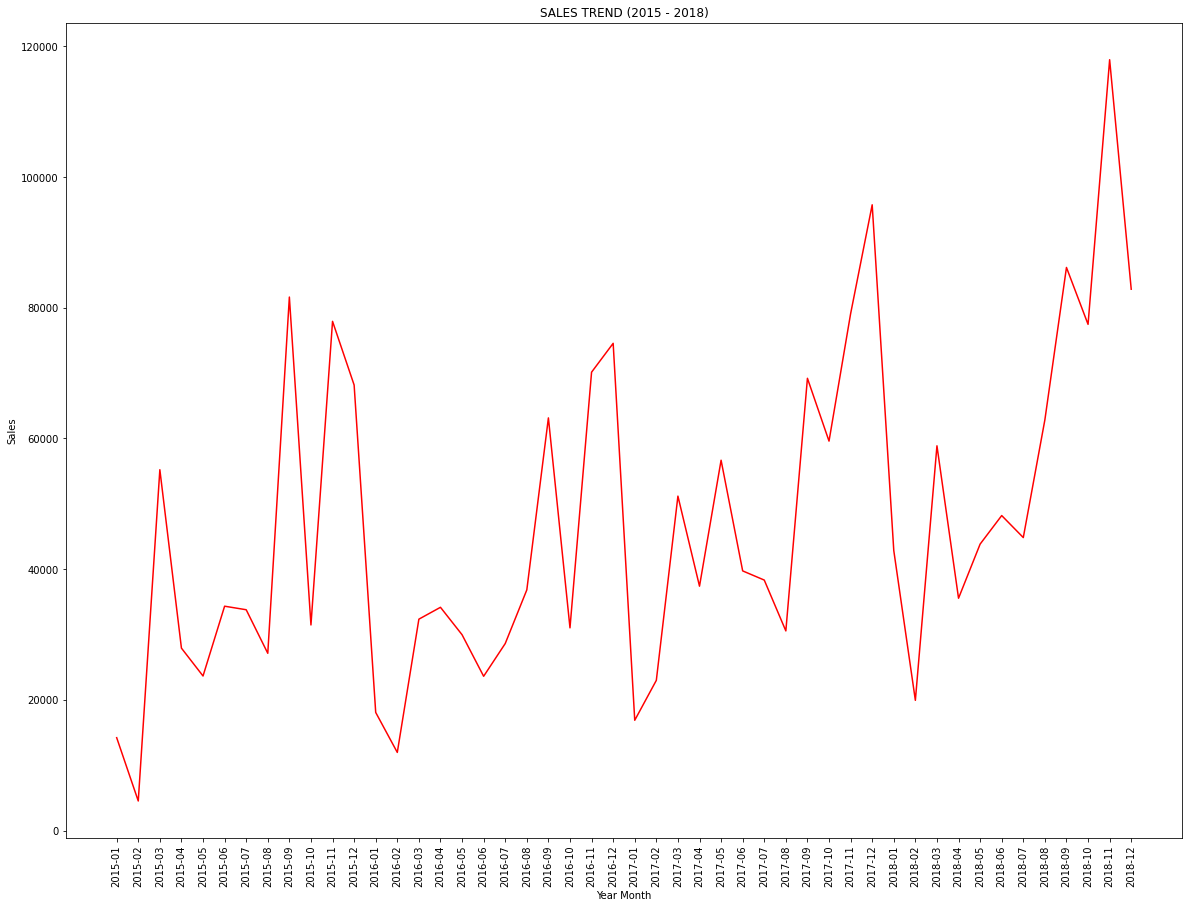

In [13]:
plt.figure( figsize =(20,15))
plt.xticks(rotation = 'vertical', size =10)
plt.plot(sales_trend['Year Month'], sales_trend['Sales'], color = 'red')
plt.title('SALES TREND (2015 - 2018)')
plt.ylabel('Sales')
plt.xlabel('Year Month')
plt.show()

In [14]:
fig = px.line(sales_trend, x="Year Month", y="Sales",title = 'SALES TREND (2015 - 2018)', width=2000, height=800)
fig.show()

In [15]:
fig = px.area(y=sales_trend['Sales'],x= sales_trend['Year Month'], title = 'SALES TREND (2015 - 2018)',labels={'x':'Year Month','y':'Sales'}, width=2000, height=800)
fig.update_layout(showlegend = False)
fig.show()


### **20 Most Selling Products?** ###
This can be viewed in **two ways**:
* Most selling in terms of numbers.
* Most selling in terms of amount.

In [16]:
most_product = sales['Product Name'].value_counts().head(20)
most_product

Staple envelope                                               47
Staples                                                       46
Easy-staple paper                                             44
Avery Non-Stick Binders                                       20
Staples in misc. colors                                       18
Staple remover                                                18
KI Adjustable-Height Table                                    17
Storex Dura Pro Binders                                       17
Staple-based wall hangings                                    16
Situations Contoured Folding Chairs, 4/Set                    15
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling     15
Eldon Wave Desk Accessories                                   14
Global Wood Trimmed Manager's Task Chair, Khaki               14
GBC Premium Transparent Covers with Diagonal Lined Pattern    14
Global High-Back Leather Tilter, Burgundy                     14
Hot File 7-Pocket, Floor 

In [17]:
most_product.iplot(title = 'MOST SELLING PRODUCTS', xTitle = "Products",yTitle = "Value Counts")

In [18]:
least_product = sales['Product Name'].value_counts().tail(10)
pd.set_option('display.max_columns', None)
least_product

Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac             1
Xerox 1892                                                                   1
Xerox WorkCentre 6505DN Laser Multifunction Printer                          1
Hewlett-Packard Deskjet D4360 Printer                                        1
Cisco Desktop Collaboration Experience DX650 IP Video Phone                  1
Park Ridge Embossed Executive Business Envelopes                             1
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier        1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection    1
Boston 1900 Electric Pencil Sharpener                                        1
LG G2                                                                        1
Name: Product Name, dtype: int64

### **Top 20 Products by Amount of Sales** ###

In [19]:
product_sales = pd.DataFrame(sales.groupby('Product Name').sum()['Sales'])
product_sales = product_sales.sort_values('Sales', ascending = False)
product_sales[:20]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.8240
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.3840
Cisco TelePresence System EX90 Videoconferencing Unit,22638.4800
HON 5400 Series Task Chairs for Big and Tall,21870.5760
GBC DocuBind TL300 Electric Binding System,19823.4790
GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
Hewlett Packard LaserJet 3310 Copier,18839.6860
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.8950
GBC DocuBind P400 Electric Binding System,17965.0680


In [20]:
product_sales[:20].iplot(kind='bar',xTitle='Products',yTitle='Amount of Sales',title='Top 20 Product by Amount of Sales')

### **Which is the most preferred Shipping Mode by Sales?** ##

In [21]:
preferred_shipping = sales.groupby('Ship Mode').sum()['Sales']
preferred_shipping

Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.491990e+05
Standard Class    1.332617e+06
Name: Sales, dtype: float64

In [22]:
preferred_shipping.iplot(kind = 'bar', xTitle='Shipping Modes',yTitle='Amount Sold',title= 'Preferred Shipping Modes')

### **Numbers of Product Sold by Category** ###

In [23]:
cat= sales.groupby(sales['Category']).count()['Sales']
cat

Category
Furniture          2076
Office Supplies    5903
Technology         1810
Name: Sales, dtype: int64

In [24]:
cat.iplot(kind='scatter',xTitle='Categories',yTitle='Amount Sold',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

### **Numbers of Products Sold by Sub-category** ###

In [25]:
sub_cat= sales.groupby(sales['Sub-Category']).count()['Sales']
sub_cat

Sub-Category
Accessories     754
Appliances      458
Art             784
Binders        1492
Bookcases       225
Chairs          606
Copiers          66
Envelopes       247
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1336
Phones          875
Storage         831
Supplies        184
Tables          314
Name: Sales, dtype: int64

In [26]:
sub_cat.iplot(kind='scatter',xTitle='Sub-Categories',yTitle='Number Sold',title='Numbers of Product Sold/ Sub-Category',
                         colorscale='-greens',fill=True)

### **Profitable Categories** ###

In [27]:
cat_sales= sales.groupby(sales['Category']).sum()['Sales'].reset_index()
cat_sales= cat_sales.sort_values('Sales', ascending = False)
cat_sales

,Category,Sales
2,Technology,825856.1130
0,Furniture,723538.4757
1,Office Supplies,703212.8240


In [28]:
cat_sales.iplot(kind='scatter', x= 'Sales', y ='Category',
                xTitle='Number Sold',yTitle='Categories',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

### **Total Sales by Sub-Category** ###

In [29]:
sub_sales= sales.groupby(sales['Sub-Category']).sum()['Sales'].reset_index()
sub_sales = sub_sales.sort_values('Sales', ascending = False)
sub_sales

,Sub-Category,Sales
13,Phones,326487.6980
5,Chairs,322107.5310
14,Storage,217779.1020
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,163881.6900
6,Copiers,146248.0940
4,Bookcases,109408.2987
1,Appliances,104075.4630


In [30]:
sub_sales.iplot(kind='scatter', x= 'Sales', y ='Sub-Category',
                xTitle='Number Sold',yTitle='Categories',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

### **Top 20 Cities With Highest Sales** ###
This is interms of **number of sales**

In [31]:

city_count= sales['City'].value_counts()
city_count = city_count.sort_values(ascending = False)
city_count.head(20)

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Dallas           156
Jacksonville     125
Detroit          115
Newark            92
Jackson           82
Columbia          81
Richmond          81
Aurora            68
Phoenix           63
Arlington         60
Name: City, dtype: int64

In [32]:
city_count.head(20).iplot(kind='line',xTitle='City',yTitle='Number of Sales',title='Top 20 Cities With Highest Sales',
                         filename='Cufflinks - Bestfit Line Chart')

### **Top 20 Cities by Amount of Sales** ###

In [33]:
city_sales= sales.groupby(sales['City']).sum()['Sales'].reset_index()
city_sales = city_sales.sort_values('Sales', ascending = False)
city_sales.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


In [34]:
city_sales.head(20).iplot(kind='scatter',x ='Sales', y= 'City',
                xTitle='Sales',yTitle='Cities',title='Top 20 Cities With Highest Sales',
                         colorscale='-blues',fill=True)

## **Time Series Forecasting With Facebook's Prophet** ##
*Facebook Prophet* is a forecasting procedure developed by *Facebook, now Meta*. The library is available in *R and Python*.

In [35]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet

In [36]:
sales_prophet = sales[["Order Date","Sales"]]
sales_prophet

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
2,2017-06-12,14.6200
3,2016-10-11,957.5775
4,2016-10-11,22.3680
...,...,...
9795,2017-05-21,3.7980
9796,2016-01-12,10.3680
9797,2016-01-12,235.1880
9798,2016-01-12,26.3760


In [37]:
sales_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9789 non-null   datetime64[ns]
 1   Sales       9789 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 229.4 KB


In [38]:
sales_prophet  = sales_prophet.rename(columns = {'Order Date': 'ds','Sales': 'y'})
sales_prophet

,ds,y
0,2017-11-08,261.9600
1,2017-11-08,731.9400
2,2017-06-12,14.6200
3,2016-10-11,957.5775
4,2016-10-11,22.3680
...,...,...
9795,2017-05-21,3.7980
9796,2016-01-12,10.3680
9797,2016-01-12,235.1880
9798,2016-01-12,26.3760


### TRAINING MODEL

In [39]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(sales_prophet)

Initial log joint probability = -5.868
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       30252.9   0.000165829       111.758      0.5346      0.5346      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       30252.9   4.43494e-05       175.993   5.098e-07       0.001      242  LS failed, Hessian reset 
     176       30252.9   1.76253e-06       66.5285      0.2091           1      270   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


### FORECAST

In [40]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-03,59.660420,-910.939041,1516.295395,59.660420,59.660420,177.868970,177.868970,177.868970,172.852205,172.852205,172.852205,1.960920,1.960920,1.960920,3.055845,3.055845,3.055845,0.0,0.0,0.0,237.529390
1,2015-01-04,59.743029,-980.670894,1359.976147,59.743029,59.743029,164.094643,164.094643,164.094643,172.852205,172.852205,172.852205,-10.132678,-10.132678,-10.132678,1.375117,1.375117,1.375117,0.0,0.0,0.0,223.837672
2,2015-01-05,59.825639,-1018.746669,1306.100023,59.825639,59.825639,157.562922,157.562922,157.562922,172.852205,172.852205,172.852205,-15.252442,-15.252442,-15.252442,-0.036840,-0.036840,-0.036840,0.0,0.0,0.0,217.388561
3,2015-01-06,59.908249,-1042.930874,1398.033000,59.908249,59.908249,157.138490,157.138490,157.138490,172.852205,172.852205,172.852205,-14.597739,-14.597739,-14.597739,-1.115976,-1.115976,-1.115976,0.0,0.0,0.0,217.046738
4,2015-01-07,59.990858,-830.488492,1523.681073,59.990858,59.990858,192.507910,192.507910,192.507910,172.852205,172.852205,172.852205,21.460597,21.460597,21.460597,-1.804892,-1.804892,-1.804892,0.0,0.0,0.0,252.498768


In [41]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1324,2019-04-05,40.464273,-1016.258158,1388.934590,37.467931,43.540410,150.170141,150.170141,150.170141,172.852205,172.852205,172.852205,-13.033305,-13.033305,-13.033305,-9.648759,-9.648759,-9.648759,0.0,0.0,0.0,190.634414
1325,2019-04-06,40.407090,-1081.092675,1456.647243,37.352452,43.519273,159.826095,159.826095,159.826095,172.852205,172.852205,172.852205,1.960920,1.960920,1.960920,-14.987030,-14.987030,-14.987030,0.0,0.0,0.0,200.233185
1326,2019-04-07,40.349907,-904.267714,1440.535487,37.273108,43.512089,142.997611,142.997611,142.997611,172.852205,172.852205,172.852205,-10.132678,-10.132678,-10.132678,-19.721915,-19.721915,-19.721915,0.0,0.0,0.0,183.347518
1327,2019-04-08,40.292724,-1036.736783,1389.166588,37.184527,43.539058,133.753915,133.753915,133.753915,172.852205,172.852205,172.852205,-15.252442,-15.252442,-15.252442,-23.845847,-23.845847,-23.845847,0.0,0.0,0.0,174.046639
1328,2019-04-09,40.235540,-1041.795741,1345.002664,37.060649,43.566026,130.889088,130.889088,130.889088,172.852205,172.852205,172.852205,-14.597739,-14.597739,-14.597739,-27.365378,-27.365378,-27.365378,0.0,0.0,0.0,171.124629


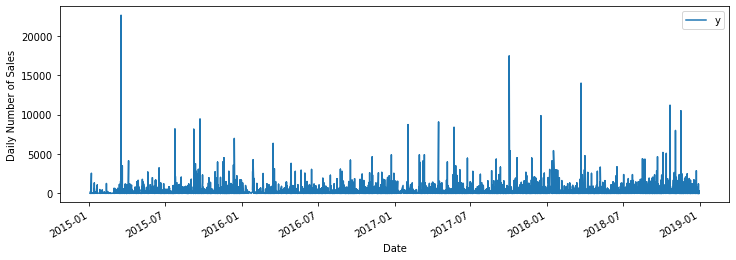

In [42]:
# plot daily sales
ax = sales_prophet.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

### **Plot Forecast** ###
Facebook Prophet comes with a special visualisation package which uses model.plot() with a passed fpreecast as its arguement to plot.

To understand, the blue line shws the predicted value, while the black dots indicate the dataset.


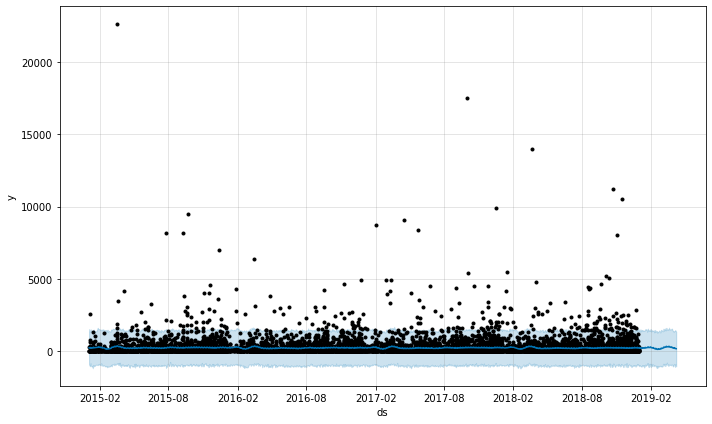

In [43]:
first_plot = m.plot(forecast)

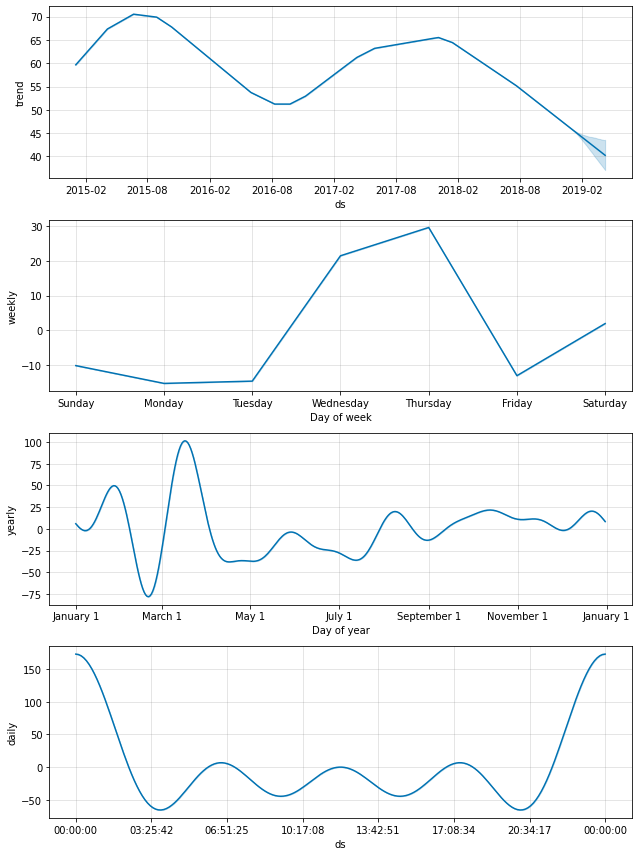

In [44]:
second_plt2 = m.plot_components(forecast)

In [45]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(7)

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-03,237.529390,-910.939041,1516.295395
1,2015-01-04,223.837672,-980.670894,1359.976147
2,2015-01-05,217.388561,-1018.746669,1306.100023
3,2015-01-06,217.046738,-1042.930874,1398.033000
4,2015-01-07,252.498768,-830.488492,1523.681073
5,2015-01-09,218.147825,-1040.215944,1398.820837
6,2015-01-10,233.956328,-1053.381637,1408.753002


In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1322,2019-04-03,237.623587,-878.496042,1382.207700
1323,2019-04-04,239.238641,-892.653942,1383.581387
1324,2019-04-05,190.634414,-1016.258158,1388.934590
1325,2019-04-06,200.233185,-1081.092675,1456.647243
1326,2019-04-07,183.347518,-904.267714,1440.535487
1327,2019-04-08,174.046639,-1036.736783,1389.166588
1328,2019-04-09,171.124629,-1041.795741,1345.002664


In [47]:
from fbprophet.diagnostics import cross_validation

## **Conclusion:** ##
The analysis and forecast ensure that the problem statement is followed with necessary questions answered with the analysis.